In [21]:
import pandas as pd

In [22]:
train = pd.read_csv('Data/our_train.csv')
test = pd.read_csv('Data/our_test.csv')
val = pd.read_csv('Data/our_val.csv')
df = pd.read_csv('Data/train.csv')

In [23]:
X_train = train.drop('NObeyesdad', axis=1)
y_train = train['NObeyesdad']
X_test = test.drop('NObeyesdad', axis=1)
y_test = test['NObeyesdad']
X_val = val.drop('NObeyesdad', axis=1)
y_val = val['NObeyesdad']

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

- brak wartości NONE
- kolumny nienumeryczne: 
    - Gender
    - family_history_with_overweight
    - FAVC
    - CAEC
    - SMOKE 
    - SCC
    - CALC 
    - MTRANS
    - NObeyesdad (nasz target)

In [25]:
#categorical columns
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

### Opisy kolumn
**id**: This column appears to be an identifier for each individual or sample.  
**Gender**: Indicates the gender of the individual (male, female, or potentially other).  
**Age**: Represents the age of the individual. It's a float, which might indicate it includes decimal values for more precision.  
**Height**: Refers to the height of the individual [m]   
**Weight**: Denotes the weight of the individual, typically measured in kilograms or pounds.  
**family_history_with_overweight**: Indicates whether the individual has a family history of overweight or obesity.  
**FAVC**: Stands for "Frequent consumption of high-caloric food", indicating whether the individual frequently consumes high-caloric foods.  
**FCVC**: Refers to the Frequency of Consumption of Vegetables.  
**NCP**: Stands for "Number of main meals", likely indicating the number of main meals the individual consumes per day.  
**CAEC**: Stands for "Consumption of food between meals", indicating the individual's eating habits between meals.  
**SMOKE**: Indicates whether the individual is a smoker or not.  
**CH2O**: Represents the amount of water the individual consumes daily, possibly measured in liters or milliliters.  
**SCC**: Stands for "Calories consumption monitoring", indicating whether the individual monitors their calorie consumption.  
**FAF**: Stands for "Physical activity frequency", indicating how frequently the individual engages in physical activity.  
**TUE**: Stands for "Time using technology devices", indicating the amount of time the individual spends using technology devices.  
**CALC**: Stands for "Consumption of alcohol", indicating the individual's alcohol consumption habits.  
**MTRANS**: Indicates the mode of transportation used by the individual.  
**NObeyesdad**: This column indicates the classification of the individual's obesity status or obesity level.

In [26]:
df['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

/Users/mateuszdeptuch/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NObeyesdad', ylabel='count'>

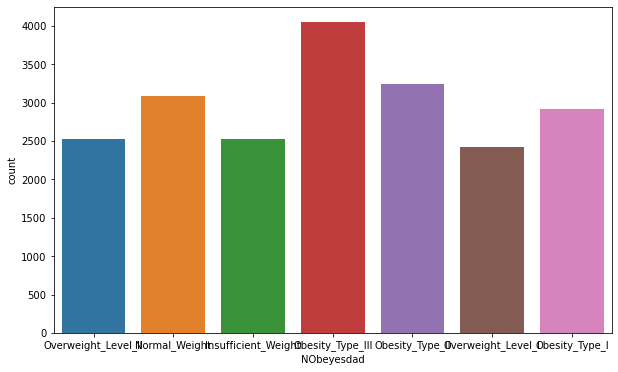

In [41]:
#plotting the target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(df['NObeyesdad'])

po rowno wsm

### categorial features brakdown

In [27]:
#unique values in each column
for col in cat_cols:
    print(col, df[col].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['Sometimes' 'no' 'Frequently']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']


### encoding (tu by się przydalo to zrobic madrzej, tzn. np. 0 - wgl nie je warzyw, 5 - je duzo)

In [28]:
#change categorical columns to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])
    X_val[col] = le.fit_transform(X_val[col])

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### baseline?
randomforest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=1000, criterion='gini') #gini najlepiej dziala
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
print(classification_report(y_val, y_pred), '\n')
print(random_forest.score(X_val, y_val))

[[475  46   0   0   0   3   1]
 [ 21 559   0   0   0  37   7]
 [  2   1 522  21   3  18  37]
 [  0   0  12 697   2   0   3]
 [  1   0   0   1 834   1   0]
 [  1  53  16   0   0 398  64]
 [  0  12  33   4   0  42 432]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       525
           1       0.83      0.90      0.86       624
           2       0.90      0.86      0.88       604
           3       0.96      0.98      0.97       714
           4       0.99      1.00      1.00       837
           5       0.80      0.75      0.77       532
           6       0.79      0.83      0.81       523

    accuracy                           0.90      4359
   macro avg       0.89      0.89      0.89      4359
weighted avg       0.90      0.90      0.90      4359
 

0.8986005964670796
